In [11]:

import plotly
import plotly.graph_objs as go

# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz

import seaborn as sns
import pingouin as pg
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv
import h5py
import fooof
from fooof.plts.spectra import plot_spectrum

#mne
from pathlib import Path
import mne_bids
from mne_bids import (
    BIDSPath,
    inspect_dataset,
    mark_channels)
import mne
from mne.time_frequency import tfr_morlet 


In [12]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'Monopolar_power_estimation', 'monopolar_directional_beta')
sys.path.append(project_path)

os.chdir(project_path)

import src.monopolar_bssu.utils.find_folders as find_folders
importlib.reload(find_folders)

# import PyPerceive

project_path = find_folders.chdir_repository("Py_Perceive")

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

# import meet

project_path = find_folders.chdir_repository("meet")

import meet as meet

# import all functions from BetaSenSightLongterm
project_path = find_folders.chdir_repository("monopolar_directional_beta")


# externalized LFP
import src.monopolar_bssu.externalized_lfp.externalized_lfp as externalized
import src.monopolar_bssu.externalized_lfp.feats_ssd as feats_ssd

# monopolar Referencing
import src.monopolar_bssu.monopol_bssu_methods.MonoRef_JLB as MonoRefJLB
#import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.monopolar_bssu.monopol_bssu_methods.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance
import src.monopolar_bssu.monopol_bssu_methods.bssu_contacts_maximal_beta as bssu_contacts
import src.monopolar_bssu.monopol_bssu_methods.monoRef_Strelow as detec_strelow

# Power Spectra
import src.monopolar_bssu.power_spectra.power_spectra_externalized as power_spectra_externalized

# Clinical stimulation parameters
import src.monopolar_bssu.clinical_contacts.activeStimulationContacts as activeStimContacts
import src.monopolar_bssu.clinical_contacts.beta_contacts_active as beta_contacts_active

# comparison analysis
import src.monopolar_bssu.comparison_analysis.monopol_comparison_tests as monopol_comparison_tests
import src.monopolar_bssu.comparison_analysis.monopol_method_comparison as monopol_method_comparison

# comparison plots
import src.monopolar_bssu.comparison_plots.method_comparison_plots as method_comparison_plots

# utility functions
import src.monopolar_bssu.utils.loadResults as loadResults
import src.monopolar_bssu.utils.find_folders as find_folders
import src.monopolar_bssu.utils.io_externalized as io_externalized
import src.monopolar_bssu.utils.io_percept as io_percept
import src.monopolar_bssu.utils.io_monopolar_comparison as io_monopolar_comparison
import src.monopolar_bssu.utils.externalized_lfp_preprocessing as externalized_lfp_preprocessing
import src.monopolar_bssu.utils.percept_lfp_preprocessing as percept_lfp_preprocessing
import src.monopolar_bssu.utils.tmsi_poly5reader as tmsi_poly5reader


importlib.reload(externalized)
importlib.reload(feats_ssd)
importlib.reload(loadResults)
importlib.reload(MonoRefJLB)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(bssu_contacts)
importlib.reload(detec_strelow)
importlib.reload(power_spectra_externalized)
importlib.reload(activeStimContacts)
importlib.reload(monopol_comparison_tests)
importlib.reload(monopol_method_comparison)
importlib.reload(loadResults)
importlib.reload(find_folders)
importlib.reload(io_externalized)
importlib.reload(io_percept)
importlib.reload(io_monopolar_comparison)
importlib.reload(externalized_lfp_preprocessing)
importlib.reload(percept_lfp_preprocessing)
importlib.reload(tmsi_poly5reader)
importlib.reload(method_comparison_plots)
importlib.reload(beta_contacts_active)

# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data
Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data


## Load data

In [63]:
# BIPOLAR
externalized_bipolar_data = io_externalized.load_data_to_weight(data_type="fooof")

percept_bipolar_data = loadResults.load_fooof_beta_ranks(
        fooof_spectrum="periodic_spectrum",
        fooof_version="v2",
        all_or_one_chan="beta_ranks_all",
        all_or_one_longterm_ses="one_longterm_session",
    )

In [3]:
# MONOPOLAR

externalized_fooof = io_monopolar_comparison.load_externalized_fooof_data(fooof_version="v2", new_reference="one_to_zero_two_to_three", reference="bipolar_to_lowermost")

externalized_ssd = io_monopolar_comparison.load_externalized_ssd_data(reference="bipolar_to_lowermost")

JLB_directional = io_monopolar_comparison.load_JLB_method(fooof_version="v2")
JLB_directional_extern_bssu = io_monopolar_comparison.load_JLB_externalized_bssu(fooof_version="v2")

euclidean_directional = io_monopolar_comparison.load_euclidean_method(fooof_version="v2")
euclidean_directional_extern_bssu = io_monopolar_comparison.load_euclidean_externalized_bssu(fooof_version="v2")

best_bssu_contacts = io_monopolar_comparison.load_best_bssu_method(fooof_version="v2")
best_bssu_contacts_extern_bssu = io_monopolar_comparison.load_best_externalized_bssu(fooof_version="v2")

detec_strelow_contacts = io_monopolar_comparison.load_detec_strelow_beta_ranks(fooof_version="v2", level_first_or_all_directional="level_first")
detec_strelow_contacts_extern_bssu = io_monopolar_comparison.load_detec_strelow_beta_ranks_externalized_bssu(fooof_version="v2", level_first_or_all_directional="level_first")

best_clinical_contacts = io_monopolar_comparison.load_best_clinical_contacts()



Excel file loaded:  BestClinicalStimulation.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/data


In [4]:
# monopolar, externalized 0-1, 2-3 ref, fooof
externalized_fooof.head()

,reference,filtered,BIDS_id,subject_hemisphere,contact,beta_rank,beta_relative_to_max,beta_cluster,method,session,estimated_monopolar_beta_psd
0,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,1A,1.0,1.000000,1,externalized_fooof,postop,4.864528e-13
1,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,1B,3.0,0.499679,2,externalized_fooof,postop,2.430705e-13
2,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,1C,2.0,0.871807,1,externalized_fooof,postop,4.240930e-13
3,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,2A,4.0,0.000269,3,externalized_fooof,postop,1.307197e-16
4,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,2B,6.0,0.000012,3,externalized_fooof,postop,5.841606e-18


In [ ]:
ext_data = io_monopolar_comparison.load_externalized_fooof_data(fooof_version="v2", 
                                                                new_reference="one_to_zero_two_to_three", 
                                                                reference="bipolar_to_lowermost")


In [5]:
externalized_fooof_beta_ranks = io_externalized.load_externalized_pickle(
    filename=f"fooof_externalized_beta_ranks_directional_contacts_one_to_zero_two_to_three_only_high_pass_filtered",
    fooof_version="v2",
    reference="bipolar_to_lowermost",
)

In [50]:
externalized_fooof_beta_ranks.head()

,reference,filtered,BIDS_id,subject,hemisphere,subject_hemisphere,contact,fooof_error,fooof_r_sq,fooof_exponent,...,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth,beta_average,beta_rank,beta_relative_to_max,beta_cluster
0,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,1A,0.039966,0.986114,0.856089,...,3,"[10.601683566146008, 0.8582242466761958, 3.000...","[14.919975005070759, 0.554247364846308, 5.0048...","[23.888667709802494, 0.8981909577785601, 7.591...","[23.888667709802494, 0.8981909577785601, 7.591...","[nan, nan, nan]",4.864528e-13,1.0,1.000000,1
1,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,1B,0.040741,0.986198,0.916091,...,3,"[10.452853561939877, 0.8460518343911438, 3.000...","[15.626551585668794, 0.5350194338622067, 6.030...","[24.368097410028906, 0.8451498635940364, 6.716...","[24.368097410028906, 0.8451498635940364, 6.716...","[nan, nan, nan]",2.430705e-13,3.0,0.499679,2
2,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,1C,0.046919,0.984861,0.845381,...,3,"[10.52811949511266, 0.9348837908071275, 3.0000...","[15.047809101032946, 0.579624024858516, 5.6732...","[24.254256549629684, 0.9264413943786032, 7.581...","[24.254256549629684, 0.9264413943786032, 7.581...","[nan, nan, nan]",4.240930e-13,2.0,0.871807,1
3,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,2A,0.070392,0.963260,1.168976,...,1,"[11.015036116740083, 0.5759623398483722, 3.000...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",1.307197e-16,4.0,0.000269,3
4,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,2B,0.043034,0.976437,0.992294,...,1,"[10.21109502868202, 0.24996329904494807, 3.000...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",5.841606e-18,6.0,0.000012,3


In [45]:
dataframe = externalized_fooof_beta_ranks
sub_hem_list = dataframe["subject_hemisphere"].unique()
total_n_chans = len(dataframe["subject_hemisphere"])
fooof_error = np.mean(dataframe["fooof_error"])
fooof_error_sem = dataframe["fooof_error"].std() / np.sqrt(dataframe["fooof_error"].count())
fooof_r_sq = np.mean(dataframe["fooof_r_sq"])
fooof_r_sq_sem = dataframe["fooof_r_sq"].std() / np.sqrt(dataframe["fooof_error"].count())



print(f"Sub-list: {sub_hem_list} \n"+
      f"DBS leads: {len(sub_hem_list)} \n"+
      f"Total number fitted channels: {total_n_chans} \n"+
      f"FOOOF error mean±sem: {fooof_error}±{fooof_error_sem} \n"+
      f"FOOOF r squared mean: {fooof_r_sq}±{fooof_r_sq_sem}")

Sub-list: ['024_Right' '024_Left' '025_Right' '025_Left' '028_Right' '028_Left'
 '029_Right' '029_Left' '030_Right' '030_Left' '032_Right' '032_Left'
 '047_Right' '047_Left' '048_Right' '048_Left' '049_Right' '049_Left'
 '052_Right' '052_Left' '056_Right' '056_Left' '059_Right' '059_Left'
 '061_Right' '061_Left' '064_Right' '064_Left' '067_Right' '067_Left'
 '069_Right' '069_Left' '071_Right' '071_Left' '072_Right' '072_Left'
 '075_Right' '075_Left' '077_Right' '077_Left' '079_Right' '079_Left'
 '080_Right' '080_Left'] 
DBS leads: 44 
Total number fitted channels: 264 
FOOOF error mean±sem: 0.07206079686242056±0.0019764033954424265 
FOOOF r squared mean: 0.9457094655911298±0.0030743060437706886


In [37]:
group_fooof_data = io_externalized.load_externalized_pickle(
        filename=f"fooof_externalized_group_one_to_zero_two_to_three_only_high_pass_filtered",
        fooof_version="v2",
        reference="bipolar_to_lowermost",
    )

In [49]:
group_fooof_data.head()

,reference,filtered,BIDS_id,subject,hemisphere,subject_hemisphere,contact,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,1A,0.039966,0.986114,0.856089,-11.557729,"[3.1686383609212377e-18, 1.9791870140692485e-1...","[-11.81543706121724, -11.966179832954918, -12....","[8.996933239722996e-07, 7.951607832895694e-06,...",3,"[10.601683566146008, 0.8582242466761958, 3.000...","[14.919975005070759, 0.554247364846308, 5.0048...","[23.888667709802494, 0.8981909577785601, 7.591...","[23.888667709802494, 0.8981909577785601, 7.591...","[nan, nan, nan]"
1,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,1B,0.040741,0.986198,0.916091,-11.722968,"[4.269274413909342e-17, 1.295936844065446e-16,...","[-11.998720613983073, -12.159973310191184, -12...","[1.8487076545821755e-05, 8.135460398753195e-05...",3,"[10.452853561939877, 0.8460518343911438, 3.000...","[15.626551585668794, 0.5350194338622067, 6.030...","[24.368097410028906, 0.8451498635940364, 6.716...","[24.368097410028906, 0.8451498635940364, 6.716...","[nan, nan, nan]"
2,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,1C,0.046919,0.984861,0.845381,-11.673898,"[3.6460612927630544e-17, 1.2750562584557248e-1...","[-11.928369057427615, -12.077180458023337, -12...","[1.3427156393946534e-05, 6.614959521542443e-05...",3,"[10.52811949511266, 0.9348837908071275, 3.0000...","[15.047809101032946, 0.579624024858516, 5.6732...","[24.254256549629684, 0.9264413943786032, 7.581...","[24.254256549629684, 0.9264413943786032, 7.581...","[nan, nan, nan]"
3,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,2A,0.070392,0.963260,1.168976,-11.800589,"[1.3387601256169922e-20, 3.667979468130145e-19...","[-12.152485899477448, -12.3583319241578, -12.5...","[8.259866022414255e-09, 3.6353255895715887e-07...",1,"[11.015036116740083, 0.5759623398483722, 3.000...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]"
4,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,2B,0.043034,0.976437,0.992294,-12.295805,"[4.6023541784696883e-20, 9.47633953450361e-19,...","[-12.594515116285162, -12.7692471587285, -12.8...","[7.857411637748601e-08, 2.419208460253597e-06,...",1,"[10.21109502868202, 0.24996329904494807, 3.000...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]"


In [46]:
dataframe = group_fooof_data
sub_hem_list = dataframe["subject_hemisphere"].unique()
total_n_chans = len(dataframe["subject_hemisphere"])
fooof_error = np.mean(dataframe["fooof_error"])
fooof_error_sem = dataframe["fooof_error"].std() / np.sqrt(dataframe["fooof_error"].count())
fooof_r_sq = np.mean(dataframe["fooof_r_sq"])
fooof_r_sq_sem = dataframe["fooof_r_sq"].std() / np.sqrt(dataframe["fooof_error"].count())



print(f"Sub-list: {sub_hem_list} \n"+
      f"DBS leads: {len(sub_hem_list)} \n"+
      f"Total number fitted channels: {total_n_chans} \n"+
      f"FOOOF error mean±sem: {fooof_error}±{fooof_error_sem} \n"+
      f"FOOOF r squared mean: {fooof_r_sq}±{fooof_r_sq_sem}")

Sub-list: ['024_Right' '024_Left' '025_Right' '025_Left' '028_Right' '028_Left'
 '029_Right' '029_Left' '030_Right' '030_Left' '032_Right' '032_Left'
 '047_Right' '047_Left' '048_Right' '048_Left' '049_Right' '049_Left'
 '052_Right' '052_Left' '056_Right' '056_Left' '059_Right' '059_Left'
 '061_Right' '061_Left' '064_Right' '064_Left' '067_Right' '067_Left'
 '069_Right' '069_Left' '071_Right' '071_Left' '072_Right' '072_Left'
 '075_Right' '075_Left' '077_Right' '077_Left' '079_Right' '079_Left'
 '080_Right' '080_Left'] 
DBS leads: 44 
Total number fitted channels: 308 
FOOOF error mean±sem: 0.06894350020742648±0.0017937087799757706 
FOOOF r squared mean: 0.9504391718744837±0.0027746940818496046


## Create Excel datafiles

In [51]:
# monopolar, externalized 0-1, 2-3 ref, fooof
externalized_fooof = io_monopolar_comparison.load_externalized_fooof_data(fooof_version="v2", new_reference="one_to_zero_two_to_three", reference="bipolar_to_lowermost")
externalized_fooof.head()

,reference,filtered,BIDS_id,subject_hemisphere,contact,beta_rank,beta_relative_to_max,beta_cluster,method,session,estimated_monopolar_beta_psd
0,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,1A,1.0,1.000000,1,externalized_fooof,postop,4.864528e-13
1,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,1B,3.0,0.499679,2,externalized_fooof,postop,2.430705e-13
2,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,1C,2.0,0.871807,1,externalized_fooof,postop,4.240930e-13
3,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,2A,4.0,0.000269,3,externalized_fooof,postop,1.307197e-16
4,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024_Right,2B,6.0,0.000012,3,externalized_fooof,postop,5.841606e-18


In [54]:
# monopolar, Percept, Euclidean, fooof
euclidean_directional = io_monopolar_comparison.load_euclidean_method(fooof_version="v2")
euclidean_directional.head()

,coord_z,coord_xy,session,subject_hemisphere,estimated_monopolar_beta_psd,contact,beta_relative_to_max,beta_cluster,method,beta_rank
1A,2.0+0.0j,0.650000+0.000000j,postop,024_Right,0.161529,1A,1.000000,1,euclidean_directional,1.0
1B,2.0+0.0j,-0.325000+0.562917j,postop,024_Right,0.155851,1B,0.964847,1,euclidean_directional,2.0
1C,2.0+0.0j,-0.325000-0.562917j,postop,024_Right,0.138092,1C,0.854902,1,euclidean_directional,3.0
2A,4.0+0.0j,0.650000+0.000000j,postop,024_Right,0.090840,2A,0.562375,2,euclidean_directional,4.0
2B,4.0+0.0j,-0.325000+0.562917j,postop,024_Right,0.088025,2B,0.544951,2,euclidean_directional,5.0


In [64]:
# bipolar, externalized, fooof
externalized_bipolar_data = io_externalized.load_data_to_weight(data_type="fooof")
externalized_bipolar_data["loaded_data"].head()


,reference,filtered,BIDS_id,subject,hemisphere,subject_hemisphere,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,01,0.044412,0.985337,0.878644,-11.684551,"[2.040732860844656e-17, 7.750273632841699e-17,...","[-11.949041043304833, -12.103727797182374, -12...","[7.88161929131356e-06, 4.274157436753946e-05, ...",3,"[10.512693718358781, 0.9268564591887536, 3.000...","[15.095997855378075, 0.5777804665493473, 5.554...","[24.137006459923743, 0.9226094598130476, 7.462...","[24.137006459923743, 0.9226094598130476, 7.462...","[nan, nan, nan]"
1,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,02,0.045170,0.988558,1.007689,-11.455216,"[1.0901655419244326e-16, 3.4079791007611395e-1...","[-11.758533771099174, -11.935878490066047, -12...","[2.715339327179203e-05, 0.00012770960963908484...",3,"[10.302985872840429, 0.9237196968742047, 3.152...","[15.322645940406519, 0.5380195155490437, 6.002...","[24.434558900880138, 0.8777634664765355, 7.250...","[24.434558900880138, 0.8777634664765355, 7.250...","[nan, nan, nan]"
2,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,03,0.041704,0.989814,1.073204,-11.358843,"[8.83336597749314e-17, 3.580688021938712e-16, ...","[-11.681890593223892, -11.870775324389502, -12...","[1.8442099028252365e-05, 0.0001155005010207149...",3,"[10.190249114144256, 0.8538622532126947, 3.267...","[15.62421971675798, 0.4844188725871028, 6.0188...","[24.52576278150827, 0.8322729828730324, 6.9954...","[24.52576278150827, 0.8322729828730324, 6.9954...","[nan, nan, nan]"
3,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,12,0.031734,0.989257,1.138363,-12.045663,"[9.597905778303166e-19, 1.2905030522851244e-17...","[-12.388343752619031, -12.588778731253617, -12...","[1.019307115036269e-06, 2.1743675116171397e-05...",3,"[10.11727527032041, 0.6303030263474252, 3.1425...","[14.534322669111285, 0.1970226233943002, 4.548...","[24.047168152581865, 0.366453283587056, 6.9211...","[24.047168152581865, 0.366453283587056, 6.9211...","[nan, nan, nan]"
4,bipolar_to_lowermost,only_high_pass_filtered,noBIDS24,024,Right,024_Right,13,0.034274,0.991814,1.232080,-11.691740,"[4.327898567823852e-17, 2.7256412272653746e-16...","[-12.062610911079558, -12.27936578289023, -12....","[2.171116618697524e-05, 0.0002252845564137572,...",3,"[10.233628895438338, 0.6121753832869832, 3.636...","[15.990479629440804, 0.1969984319478506, 3.000...","[23.792869348458275, 0.2862768114509091, 7.396...","[23.792869348458275, 0.2862768114509091, 7.396...","[nan, nan, nan]"


In [3]:
# bipolar, Percept, fooof
beta_average_DF = loadResults.load_fooof_beta_ranks(
        fooof_spectrum="periodic_spectrum",
        fooof_version="v2",
        all_or_one_chan="beta_ranks_all",
        all_or_one_longterm_ses="one_longterm_session",
    )

In [6]:
beta_average_DF.head()

,index,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth,beta_average,beta_rank
0,3,017_Right,fu3m,12,0.07857,0.972904,1.343522,0.757904,"[0.0003292927862230677, 0.0003079802974601531,...","[0.35352735458664525, 0.11698373243642358, -0....","[6.336812502902425e-05, 0.00010218204803303865...",4,"[nan, nan, nan]","[nan, nan, nan]","[29.43438184459086, 1.099716477148555, 4.71406...","[29.43438184459086, 1.099716477148555, 4.71406...","[nan, nan, nan]",0.204537,1.0
1,4,017_Right,fu3m,01,0.071117,0.979469,1.587926,1.157176,"[0.0260612717972748, 0.08068602780119916, 0.20...","[0.6815260508032184, 0.4132884933120965, 0.253...","[0.0023628423792285266, 0.01374512167041695, 0...",4,"[nan, nan, nan]","[nan, nan, nan]","[33.50000000000001, 0.34359567811682745, 3.000...","[33.50000000000001, 0.34359567811682745, 3.000...","[64.15854737876835, 0.19383025351969008, 10.73...",0.030401,3.0
2,5,017_Right,fu3m,23,0.075302,0.975031,1.291468,0.634505,"[3.658637837133938e-10, 8.781297688997824e-09,...","[0.24573455686045234, 0.018318407410551848, -0...","[9.023380458332988e-11, 3.6561550966272852e-09...",3,"[nan, nan, nan]","[13.602286189596768, 0.49020364390555904, 3.46...","[30.219295965656492, 1.0778976327745415, 6.289...","[30.219295965656492, 1.0778976327745415, 6.289...","[nan, nan, nan]",0.193264,2.0
0,12,017_Right,fu3m,1A2A,0.086413,0.969713,1.477671,1.203942,"[1.051259040174557e-05, 9.481947880196628e-06,...","[0.7591189582797522, 0.4989144774934115, 0.314...","[7.950153134128949e-07, 1.3054734695782597e-06...",3,"[nan, nan, nan]","[nan, nan, nan]","[30.823647968559502, 1.0136923869600145, 7.425...","[30.823647968559502, 1.0136923869600145, 7.425...","[nan, nan, nan]",0.277904,1.0
1,13,017_Right,fu3m,1B2B,0.074097,0.965587,1.172131,0.590142,"[0.008637710295463563, 0.008756105291477745, 0...","[0.23946149626184762, 0.034419922498690476, -0...","[0.0021667278346138965, 0.0035272626669674077,...",4,"[nan, nan, nan]","[17.35611052694957, 0.1139847371212338, 11.042...","[31.41707924195963, 0.9693953353238327, 4.1148...","[31.41707924195963, 0.9693953353238327, 4.1148...","[nan, nan, nan]",0.158807,2.0


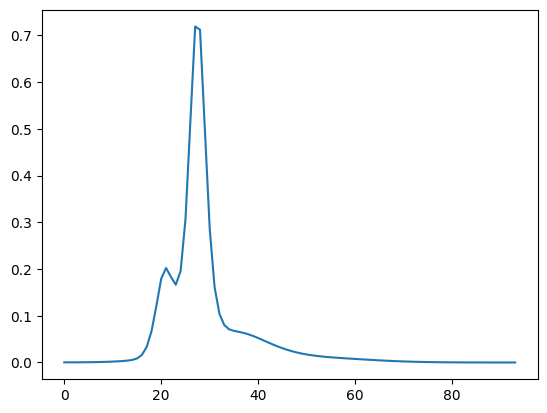

In [77]:
re_index = beta_average_DF.reset_index()
psd = re_index["fooof_power_spectrum"][0]
plt.plot(psd)

In [24]:
# Function to add the average euclidean coordinates to a structured table with bipolar power

d = 2  # SenSight B33005: 0.5mm spacing between electrodes, 1.5mm electrode length
    # so 2mm from center of one contact to center of next contact

r = 0.65  # change this radius as you wish - needs to be optimised


contact_coordinates = {
            "0": [d * 0.0, 0 + 0 * 1j],
            "1": [d * 1.0, 0 + 0 * 1j],
            "2": [d * 2.0, 0 + 0 * 1j],
            "3": [d * 3.0, 0 + 0 * 1j],
            "1A": [d * 1.0, r * np.cos(0) + r * 1j * np.sin(0)],
            "1B": [d * 1.0, r * np.cos(2 * np.pi / 3) + r * 1j * np.sin(2 * np.pi / 3)],
            "1C": [d * 1.0, r * np.cos(4 * np.pi / 3) + r * 1j * np.sin(4 * np.pi / 3)],
            "2A": [d * 2.0, r * np.cos(0) + r * 1j * np.sin(0)],
            "2B": [d * 2.0, r * np.cos(2 * np.pi / 3) + r * 1j * np.sin(2 * np.pi / 3)],
            "2C": [d * 2.0, r * np.cos(4 * np.pi / 3) + r * 1j * np.sin(4 * np.pi / 3)],
        }

def add_euclidean_corrdinates_to_percept_data():
    """ 
    Load the dataframe with Percept bipolar power, FOOOF
    
    """

    bipolar_dataframe = loadResults.load_fooof_beta_ranks(
        fooof_spectrum="periodic_spectrum",
        fooof_version="v2",
        all_or_one_chan="beta_ranks_all",
        all_or_one_longterm_ses="one_longterm_session",
    )

    bipolar_dataframe = bipolar_dataframe.reset_index()
    bipolar_dataframe.drop(columns="index", inplace=True) 

    dataframe_with_coordinates = MonoRefWeightedCoordinateDistance.calculate_average_coordinates_between_contacts(
    session_Dataframe_coord=bipolar_dataframe, only_segmental="no", contact_coordinates=contact_coordinates)

    return dataframe_with_coordinates

def add_euclidean_coordinates_to_ext_data():
    """ 
    Load the externalized monopolar data, FOOOF and add the euclidean coordinates of the contacts

    """

    externalized_fooof = io_monopolar_comparison.load_externalized_fooof_data(fooof_version="v2", new_reference="one_to_zero_two_to_three", reference="bipolar_to_lowermost")

    # add columns coord_z and coord_xy
    externalized_fooof['coord_z'] = externalized_fooof['contact'].map(lambda x: contact_coordinates.get(x, [None, None])[0])
    externalized_fooof['coord_xy'] = externalized_fooof['contact'].map(lambda x: contact_coordinates.get(x, [None, None])[1])

    return externalized_fooof

def write_data_to_excel():
    """
    """

    # monopolar, externalized 0-1, 2-3 ref, fooof
    externalized_monopolar_fooof = add_euclidean_coordinates_to_ext_data()
    fname_monopolar_externalized = "externalized_monopolar_fooof_data.xlsx"

    # bipolar, Percept, fooof
    bipolar_percept_fooof = add_euclidean_corrdinates_to_percept_data()
    fname_bipolar_percept = "percept_bipolar_fooof_data.xlsx"

    # save as Excel
    filepath = find_folders.get_monopolar_project_path(folder="GroupResults")
    filepath_monopolar = os.path.join(filepath, fname_monopolar_externalized)
    filepath_bipolar = os.path.join(filepath, fname_bipolar_percept)

    externalized_monopolar_fooof.to_excel(filepath_monopolar)
    bipolar_percept_fooof.to_excel(filepath_bipolar)


    return externalized_monopolar_fooof, bipolar_percept_fooof




In [22]:
externalized_fooof = add_euclidean_coordinates_to_ext_data()
externalized_fooof.head()

In [13]:
dataframe_with_coordinates = add_euclidean_corrdinates_to_percept_data()
dataframe_with_coordinates.head()

In [25]:
externalized_monopolar_fooof, bipolar_percept_fooof = write_data_to_excel()